In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import kagglehub
%matplotlib inline

In [2]:
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

In [3]:
df = pd.read_csv(path + "/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(df.date)
print(type(df.date.iloc[0]))

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object
<class 'str'>


In [6]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df

df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))

In [7]:
df.groupby('sales_month')
print(df.groupby('sales_month')['id'].count())
print(df.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# drop unnecessary features, replace df

df = df.drop(columns=['id', 'date', 'zipcode'])


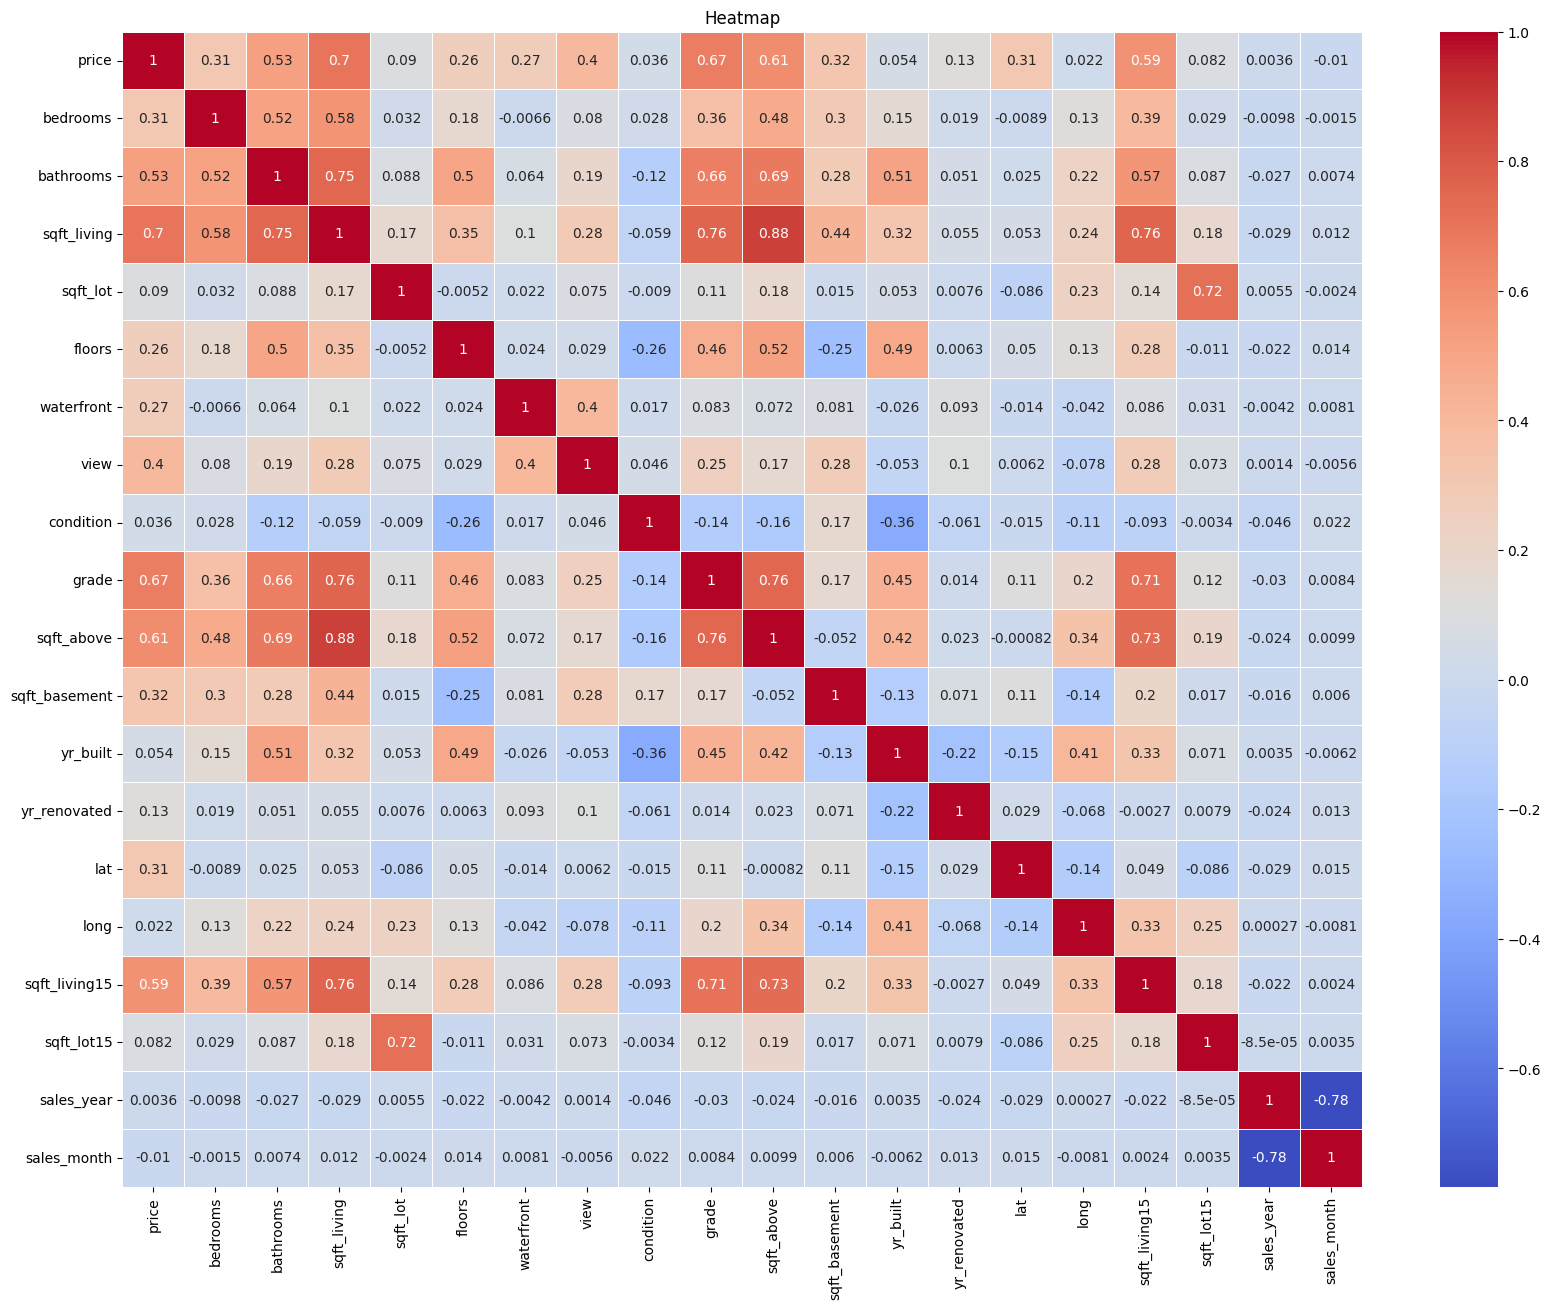

In [10]:
# heatmap of correlation matrix
df.corr()
correlation_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Heatmap")
plt.savefig("heatmapLinear.jpg")

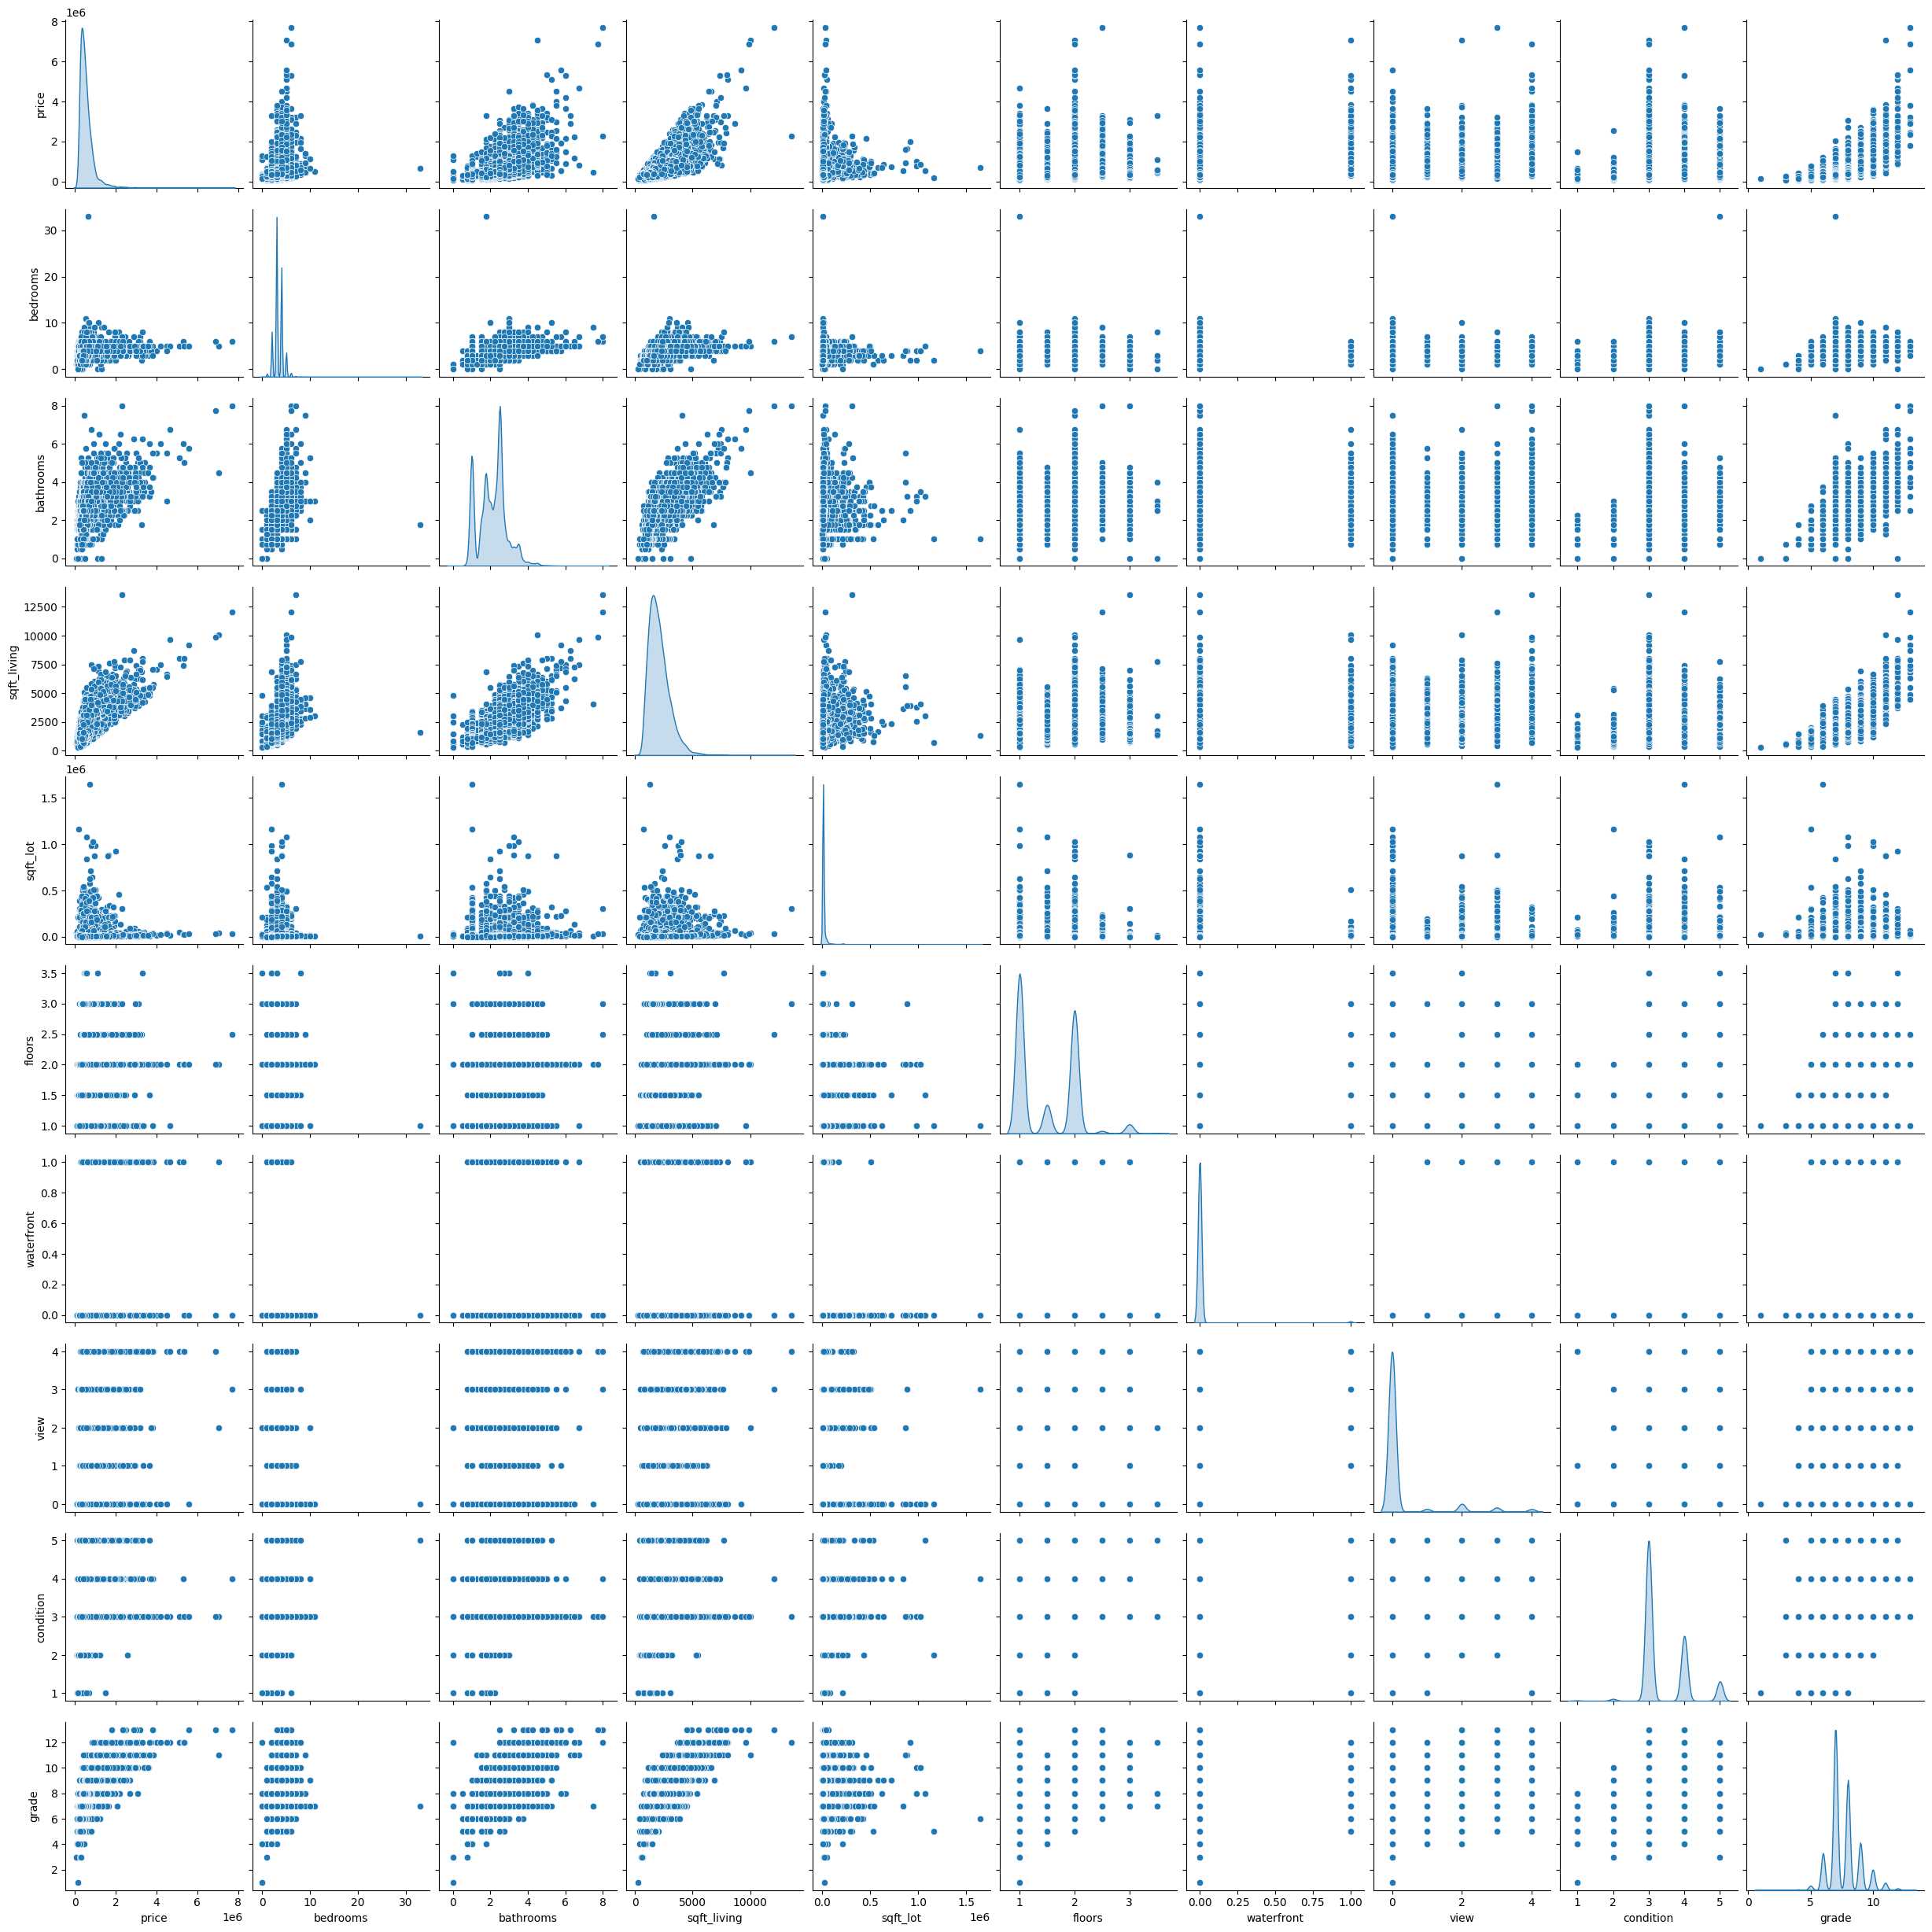

In [11]:
# pairplot of all features
# Select the first 10 columns
subset_data = df.iloc[:, :10]
# Create the pairplot with KDE on the diagonal
sns.pairplot(subset_data, diag_kind='kde')
plt.savefig("pairplotLinear.jpg")
# Show the plot
plt.show()


In [12]:
# split training data from test data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


In [13]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

# Make sure to use the `statsmodels.formula.api.ols` function for building the model. 
model = smf.ols(formula = 'price ~ sqft_living', data = X_train)
model = model.fit()
print(model.params)
print(model.summary())

#update following value according to the result
adj_R2 = 0.4933 

Intercept     -41999.186040
sqft_living      279.554779
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:28:20   Log-Likelihood:            -2.3995e+05
No. Observations:               17290   AIC:                         4.799e+05
Df Residuals:                   17288   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [14]:
# get names of all columns in the subset_data
column_names = df.columns


In [15]:
# iterate through all columns in the subset_data
for name in column_names:
    model = smf.ols(formula = f'price ~ {name}', data = X_train)
    res = model.fit()
    print(f"Formula: {model.formula} R2: ", res.rsquared)
    print(f"Adjusted R2: ", res.rsquared_adj)

    


Formula: price ~ price R2:  1.0
Adjusted R2:  1.0
Formula: price ~ bedrooms R2:  0.095025581383548
Adjusted R2:  0.09497323441347527
Formula: price ~ bathrooms R2:  0.2773262253478085
Adjusted R2:  0.2772844233016115
Formula: price ~ sqft_living R2:  0.49238383875829517
Adjusted R2:  0.4923544764167147
Formula: price ~ sqft_lot R2:  0.008288101908683676
Adjusted R2:  0.008230737731329874
Formula: price ~ floors R2:  0.06422421202075601
Adjusted R2:  0.06417008338887376
Formula: price ~ waterfront R2:  0.06398161596159602
Adjusted R2:  0.06392747329708659
Formula: price ~ view R2:  0.15374861897410197
Adjusted R2:  0.15369966875539376
Formula: price ~ condition R2:  0.0013208590426512234
Adjusted R2:  0.001263091854951215
Formula: price ~ grade R2:  0.4423492251261131
Adjusted R2:  0.44231696860280934
Formula: price ~ sqft_above R2:  0.3639167561266776
Adjusted R2:  0.3638799627877215
Formula: price ~ sqft_basement R2:  0.10328979069014044
Adjusted R2:  0.10323792175161017
Formula: pric